In [1]:
% matplotlib inline

import h5py as hp
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

In [34]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/genomics/ostreo.mat'
f = hp.File(cfname)
f.keys()

(1, 64)


In [40]:
# import the optimally interpolated salinity data
cfname = '/Volumes/sclayton/kuroshio/cruise_data/D3MAPS1.mat'
g = sio.loadmat(cfname)
g.keys()

['loni',
 'salti',
 'zi',
 'vi',
 'tempi',
 '__header__',
 '__globals__',
 'DEPTH',
 'sigmi',
 'pressi',
 'ui',
 '__version__',
 'lati']

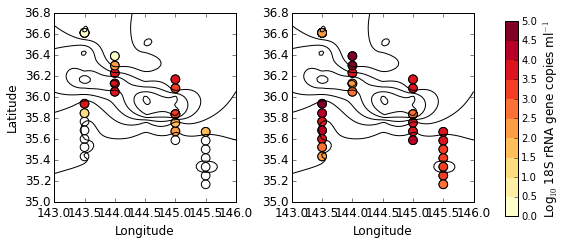

In [71]:
# make a plot of the data
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

fig3 = plt.figure(1, figsize=(7,3.5), dpi = 600)
palette = plt.get_cmap('YlOrRd',10)

plt.subplot(1,2, 1)
plt.contour(g['loni'],g['lati'],g['salti'][0,:,:],colors ='k')
plt.scatter(f['lon'],f['lat'],s=75, facecolors='none', edgecolors='k')
plt.scatter(f['lon'],f['lat'],s=75,c=np.log10(f['O'][0,:]), vmin=0, vmax=5, cmap=palette)
plt.xlim([143, 146])
plt.ylim([35, 36.8])
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(1,2, 2)
plt.contour(g['loni'],g['lati'],g['salti'][0,:,:],colors ='k')
plt.scatter(f['lon'],f['lat'],s=75, facecolors='none', edgecolors='k')
im = plt.scatter(f['lon'],f['lat'],s=75,c=np.log10(f['O'][1,:]), vmin=0, vmax=5,cmap=palette)
plt.xlim([143, 146])
plt.ylim([35, 36.8])
plt.xlabel('Longitude', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

fig3.subplots_adjust(right=1)
cbar_ax = fig3.add_axes([1.01, 0.125, 0.025, 0.775])
cb = fig3.colorbar(im, cbar_ax)
cb.set_label(label=r'Log$_{10}$ 18S rRNA gene copies ml$^{-1}$',fontsize=12)

fig3.savefig('/Users/sclayton/Desktop/LO_fig3.tiff', format='tiff', dpi=600)